In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
weight = np.array([128,123,129,143,132,142,112,118,108,119])
height = np.array([67,67,72,69,69,70,67,67,66,68])
height_s = (height - height.mean()) / (height.std())
height_square_s = height_s * height_s
print(height_s, height_square_s)

[-0.69748583 -0.69748583  2.20870514  0.46499055  0.46499055  1.04622875
 -0.69748583 -0.69748583 -1.27872403 -0.11624764] [ 0.48648649  0.48648649  4.87837838  0.21621622  0.21621622  1.09459459
  0.48648649  0.48648649  1.63513514  0.01351351]


In [3]:
# initialize parameters
w1 = tf.Variable([1.0],dtype=tf.float32)
w2 = tf.Variable([1.0],dtype=tf.float32)
b = tf.Variable([1.0],dtype=tf.float32)

In [4]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
x1, x2, y

(<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>)

In [5]:
# define MSE
loss = tf.reduce_mean(tf.square(y - (w1 * x1 + w2 * x2 + b)))

In [6]:
# define optimizer
STEP_SIZE = 0.0001
optimizer = tf.train.GradientDescentOptimizer(STEP_SIZE)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [7]:
sess = tf.Session()
MAXSTEPS = 100000
MOD=10000
#initialize all variables
sess.run(init)

In [8]:
for step in range(MAXSTEPS+1):
    (_,w1opt,w2opt,bopt,loss_opt) = sess.run([train,w1,w2,b,loss],feed_dict={x1:height_s, x2:height_square_s, y:weight})
    if (step % MOD) == 0:
        print(step, w1opt, w2opt, bopt, loss_opt)

0 [ 1.00110519] [ 1.02418041] [ 1.02468002] 15340.1
10000 [-9.96569157] [ 18.13794327] [ 89.54975891] 977.132
20000 [-2.7345767] [ 7.10713053] [ 111.57816315] 273.657
30000 [ 3.80757737] [ 1.21222675] [ 120.97491455] 101.938
40000 [ 7.65852737] [-1.92925239] [ 125.66654205] 53.6835
50000 [ 9.76005077] [-3.60341668] [ 128.12580872] 39.9851
60000 [ 10.88636208] [-4.49484777] [ 129.42376709] 36.1034
70000 [ 11.48677444] [-4.96929884] [ 130.11482239] 34.9988
80000 [ 11.80551147] [-5.21945333] [ 130.48164368] 34.6847
90000 [ 11.97369289] [-5.34966755] [ 130.66378784] 34.5967
100000 [ 12.06577682] [-5.42919636] [ 130.79104614] 34.5665


In [9]:
f_predict = np.zeros(10)
f_predict

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
def f_pred(x):
    return w1opt * x + w2opt * (x ** 2) + bopt

In [13]:
x = np.linspace(-1.5,3.0,101)

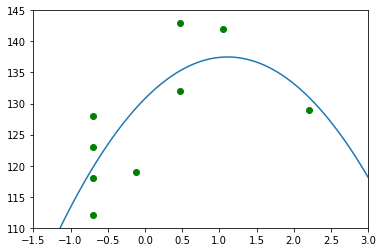

In [14]:
# predicted points (red)
plt.plot(x, f_pred(x))
# expected points (green)
plt.plot(height_s, weight, 'go')
plt.axis([-1.5, 3.0, 110, 145])
plt.show()

#Several points are in the same position.